-    6559
+    1977
Name: target, dtype: int64


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [16]:
"#################SVM##############################################"
#SVM
df = data

# extract the predictor variables and the target variable
X = df.drop(['target', 'patient_id'], axis=1)
y = df['target']

# encode categorical variables
# get a list of columns where the data type is object
object_cols = list(X.select_dtypes(include=['object']).columns)
# perform one-hot encoding on categorical variables
X = pd.get_dummies(X, columns=object_cols)


##### feature selection #####

# Define the range of k values
k_values = range(15, 20) #### adjust here computational cost ##### ###best value is 17
best_f1_score = 0.0
best_result = None

for k in k_values:
    print("trial:", k)
    # Apply SelectKBest feature selection
    k_best = SelectKBest(score_func=f_classif, k=k)  # Choose the desired number of features (k)
    X_selected = k_best.fit_transform(X, y)

    # Get the indices of the selected features
    selected_indices = k_best.get_support(indices=True)

    # Get the names of the selected features (assuming X is a DataFrame)
    selected_features = X.columns[selected_indices]

    # Print the selected feature names
    #print("Selected features for k =", k)
    #print(selected_features)
    
    ##### hyperparameter tuning ######

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    sc = StandardScaler()
    X_train_scale = sc.fit_transform(X_train)
    X_test_scale = sc.transform(X_test)

    # Define the parameter grid
    param_grid = {
        'C': randint(1, 100),                         # List of discrete values for C
        'gamma': [0.001, 0.01, 0.1],                 # List of discrete values for gamma
        'kernel': ['linear', 'rbf', 'poly']          # List of kernel options
    }

    # Create an SVM classifier
    svm = SVC()

    # Create the RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

    # Perform random search to find the best hyperparameters
    random_search.fit(X_train_scale, y_train)

    # Evaluate the best model on the testing set
    best_model = random_search.best_estimator_
    accuracy = best_model.score(X_test_scale, y_test)

    # Print the best hyperparameters and the evaluation score
    #print("Best Hyperparameters for k =", k)
    #print(random_search.best_params_)

    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X_train_scale, y_train, cv=5)

    # Fit the model to the training data
    best_model.fit(X_train_scale, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test_scale)

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    #print("Cross-Validation Scores:", cv_scores)
    #print("Average Cross-Validation Score:", np.mean(cv_scores))
    #print("Performance of the SVM model:")
    #print("Accuracy: {:.3f}; Precision: {:.3f}; Recall: {:.3f}; F1 score: {:.3f}".format(accuracy, precision, recall, f1))

    # Update the best k and the corresponding results if the F1 score is better
    if f1 > best_f1_score:
        best_f1_score = f1
        best_result = {
            'k': k,
            'selected_features': selected_features,
            'best_model': best_model,
            'X_test_scale': X_test_scale,
            'y_test': y_test,
            'best_hyperparameters': random_search.best_params_,
            'best_accuracy': accuracy,
            'cv_scores': cv_scores,
            'average_cv_score': np.mean(cv_scores),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

#print(best_result)

Selected features for k = 15
Index(['TSH', 'TT4', 'T4U', 'on_thyroxine_f', 'on_thyroxine_t', 'pregnant_f',
       'pregnant_t', 'TSH_measured_f', 'TSH_measured_t', 'TT4_measured_f',
       'TT4_measured_t', 'TBG_measured_f', 'TBG_measured_t',
       'referral_source_STMW', 'referral_source_SVHC'],
      dtype='object')
Best Hyperparameters for k = 15
{'C': 59, 'gamma': 0.1, 'kernel': 'rbf'}
Average Cross-Validation Score: 0.8857637335821817
Performance of the SVM model:
Accuracy: 0.889; Precision: 0.887; Recall: 0.889; F1 score: 0.882
Selected features for k = 16
Index(['TSH', 'TT4', 'T4U', 'FTI', 'on_thyroxine_f', 'on_thyroxine_t',
       'pregnant_f', 'pregnant_t', 'TSH_measured_f', 'TSH_measured_t',
       'TT4_measured_f', 'TT4_measured_t', 'TBG_measured_f', 'TBG_measured_t',
       'referral_source_STMW', 'referral_source_SVHC'],
      dtype='object')
Best Hyperparameters for k = 16
{'C': 59, 'gamma': 0.1, 'kernel': 'rbf'}
Average Cross-Validation Score: 0.8878144793225321
Perform

In [20]:
print("Best k:", best_result['k'])
print("Best Hyperparameters:", best_result['best_hyperparameters'])
print("Best Feature selection:", best_result['selected_features'])
print("Cross-Validation Scores:", best_result['cv_scores'])
print("Average Cross-Validation Score:", best_result['average_cv_score'])
print("Performance of the SVM model:")
print("Accuracy: {:.3f}; Precision: {:.3f}; Recall: {:.3f}; F1 score: {:.3f}".format(best_result['accuracy'], best_result['precision'], best_result['recall'], best_result['f1_score']))


Best Hyperparameters: {'C': 59, 'gamma': 0.1, 'kernel': 'rbf'}
Best Feature selection: Index(['TSH', 'TT4', 'T4U', 'FTI', 'on_thyroxine_f', 'on_thyroxine_t',
       'pregnant_f', 'pregnant_t', 'TSH_measured_f', 'TSH_measured_t',
       'TT4_measured_f', 'TT4_measured_t', 'T4U_measured_t', 'TBG_measured_f',
       'TBG_measured_t', 'referral_source_STMW', 'referral_source_SVHC'],
      dtype='object')
Cross-Validation Scores: [0.90043924 0.87994143 0.88506589 0.88351648 0.89010989]
Average Cross-Validation Score: 0.8878145865847185
Performance of the SVM model:
Accuracy: 0.896; Precision: 0.893; Recall: 0.896; F1 score: 0.890


Top 10 features:
           Feature  Importance
1              TT4    0.159368
3              FTI    0.121663
0              TSH    0.094848
2              T4U    0.085012
11  TT4_measured_t    0.068326
10  TT4_measured_f    0.068326
14  TBG_measured_t    0.051815
13  TBG_measured_f    0.051815
9   TSH_measured_t    0.050059
8   TSH_measured_f    0.050059


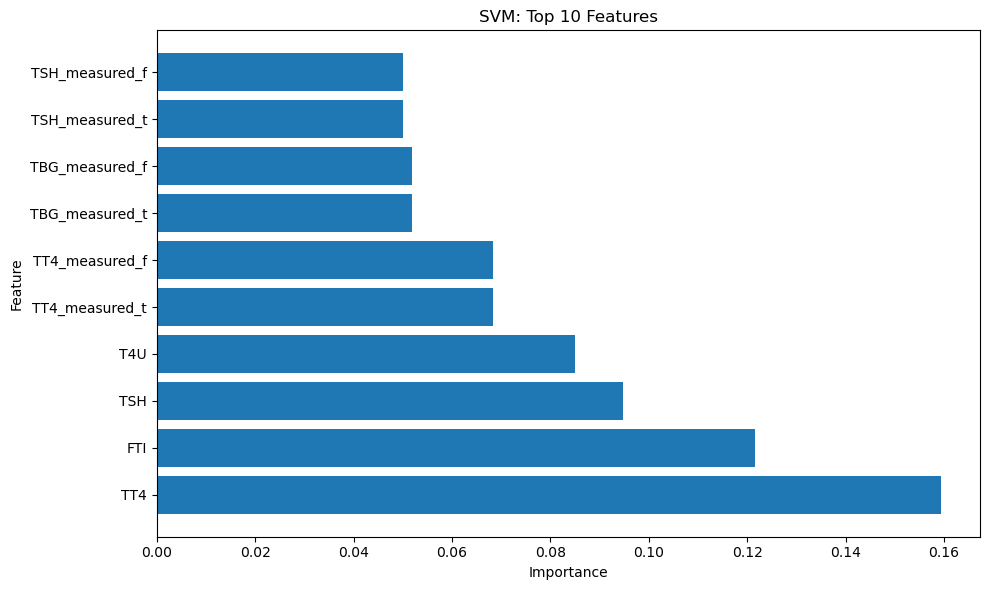

In [21]:
#### feature importance

# Compute permutation importances
perm_importance = permutation_importance(best_result['best_model'], best_result['X_test_scale'], best_result['y_test'], n_repeats=10, random_state=42)
feature_importance = perm_importance.importances_mean

# Create a DataFrame to store the importances and feature names
feature_df = pd.DataFrame({'Feature': best_result['selected_features'], 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_df = feature_df.sort_values('Importance', ascending=False)

# Get the top 10 features with highest importances
top_features = feature_df.head(10)

# Get the bottom 10 features with lowest importances
#bottom_features = feature_df.tail(10)

# Print the top 10 features
print("Top 10 features:")
print(top_features)

# Print the bottom 10 features
#print("Bottom 10 features:")
#print(bottom_features)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Multiclass SVM: Top 10 Features')
plt.tight_layout()
#plt.show()
plt.savefig('../output/SVM_feature_selection_multliclass.png')
plt.clf()